In [1]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('./科三＿每日_20150802_20171204.csv')
df.head()
df.columns

Index(['﻿時  間', '區 域', '館 舍 別', '迴 路 別', '用電別', '用電量(單位:度)'], dtype='object')

In [4]:
df_te = df[['﻿時  間','用電量(單位:度)']]
print(df_te.describe())
print(df_te.shape)

          用電量(單位:度)
count  8.540000e+02
mean   5.195167e+04
std    7.369193e+05
min    1.196300e+02
25%    8.577562e+03
50%    1.000275e+04
75%    1.095450e+04
max    2.012003e+07
(854, 2)


In [5]:
#處理離群值
df_new = df_te[np.abs(df_te[['用電量(單位:度)']] - df_te[['用電量(單位:度)']].mean())<=(1*df_te[['用電量(單位:度)']].std())]
df_new

﻿時  間  用電量(單位:度)
0     NaN     119.63
1     NaN    8037.25
2     NaN    9839.63
3     NaN        NaN
4     NaN   10472.63
5     NaN    9539.25
6     NaN    8204.25
7     NaN    8506.25
8     NaN   10359.25
9     NaN   10670.38
10    NaN   10773.25
11    NaN   10620.75
12    NaN   10341.25
13    NaN    9302.00
14    NaN        NaN
15    NaN   10771.50
16    NaN   11393.75
17    NaN   11375.50
18    NaN   11060.25
19    NaN   10973.50
20    NaN    9901.75
21    NaN    9376.00
22    NaN   10327.50
23    NaN   10558.25
24    NaN   10686.25
25    NaN   10210.50
26    NaN    9753.00
27    NaN    8955.75
28    NaN    9079.50
29    NaN    9638.25
..    ...        ...
824   NaN    8825.00
825   NaN   10072.00
826   NaN   10513.00
827   NaN   10155.00
828   NaN   10255.00
829   NaN   10093.00
830   NaN    9010.00
831   NaN    8732.00
832   NaN    9705.00
833   NaN        NaN
834   NaN    9896.00
835   NaN   10102.00
836   NaN   10025.00
837   NaN    9129.00
838   NaN    8089.00
839   NaN    8936.00
840   NaN    9513.00
841   NaN    9330.00
842   NaN    8068.00
843   NaN    6976.00
844   NaN    6241.00
845   NaN    6193.00
846   NaN    8232.00
847   NaN    9867.00
848   NaN    9803.00
849   NaN    9715.00
850   NaN    9356.00
851   NaN    8501.00
852   NaN    8363.00
853   NaN    8985.00

[854 rows x 2 columns]

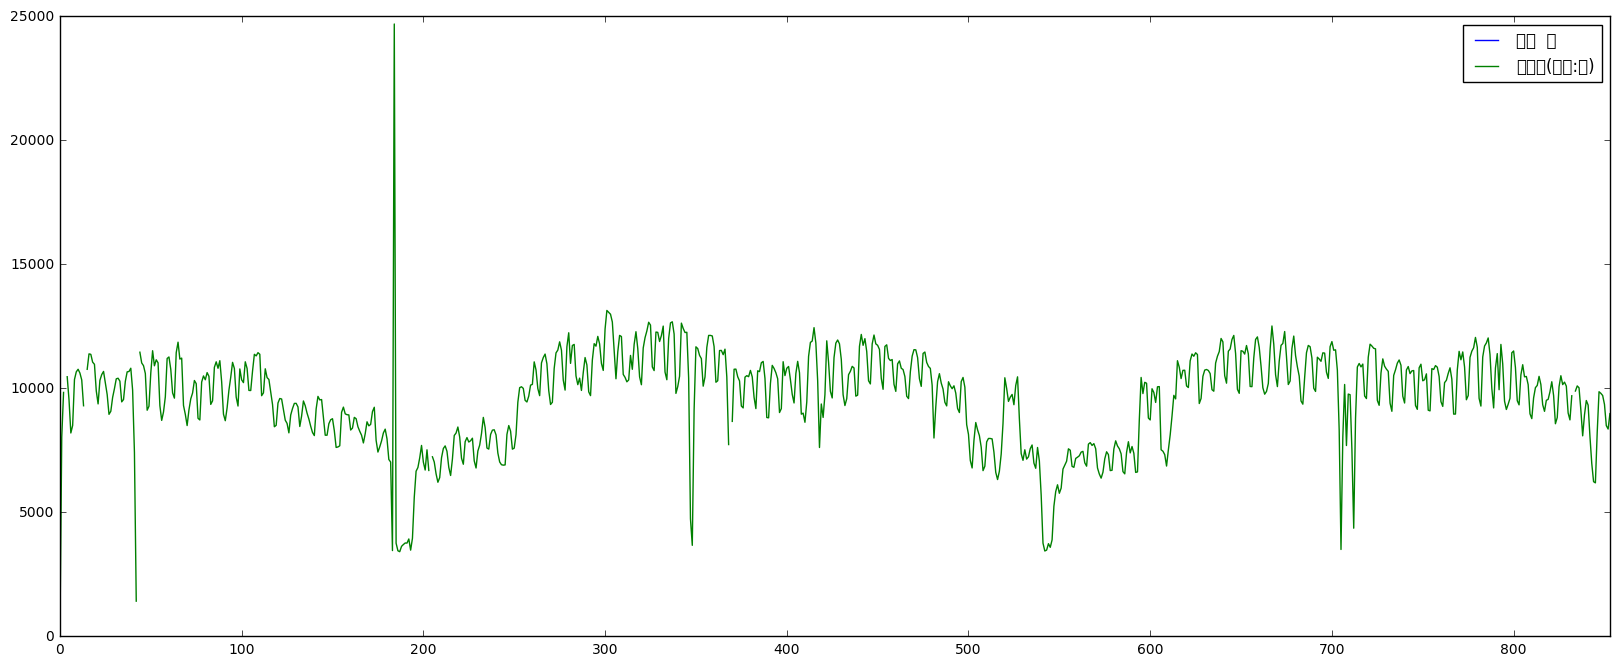

In [6]:
#畫圖
df_new.plot.line()

In [7]:
df5 = df_new.rename(index=str, columns={'﻿時  間':"Date_Time"})
df5 = df5.rename(index=str, columns={'用電量(單位:度)':"Usage(In degree)"})
df5.columns


Index(['Date_Time', 'Usage(In degree)'], dtype='object')

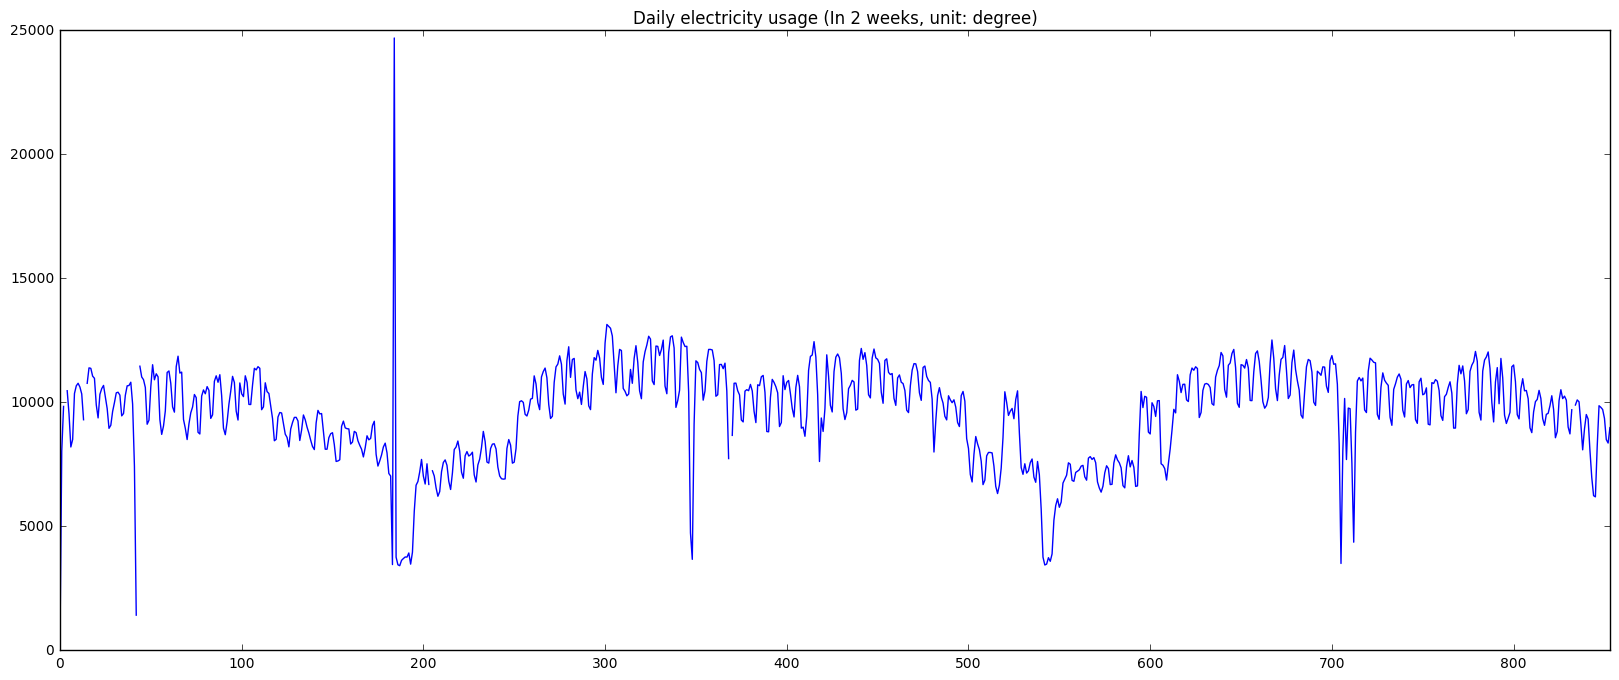

In [8]:
# df4 = df2[np.abs(df2[['用電量(單位:度)']] - df2[['用電量(單位:度)']].mean())<=(5*df2[['用電量(單位:度)']].std())]
df_new['用電量(單位:度)'].plot.line()
matplotlib.pyplot.title('Daily electricity usage (In 2 weeks, unit: degree)')

In [9]:
# df2 = df2.set_index('﻿時  間')
# df2.index.rename('Date_Time')
# df2.groupby(pd.TimeGrouper('D')).mean().dropna()
df5.Date_Time.str[-2:]
df5.loc[:,'Days'] = pd.Series(df5.Date_Time.str[-2:])
df_new = df5
df_new.head()

Date_Time  Usage(In degree)  Days
0       NaN            119.63   NaN
1       NaN           8037.25   NaN
2       NaN           9839.63   NaN
3       NaN               NaN   NaN
4       NaN          10472.63   NaN

In [10]:
#科三每小時用電量
df_gpby = df_new.groupby(['Days'])
df_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')